# Load Data

In [519]:
import pandas as pd
sample_data = pd.read_csv("../data/raw/train.csv")

/var/folders/jn/dc5313mj0qs72qr08qqw3w3r0000gn/T/ipykernel_70568/3757845114.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_data = pd.read_csv("../data/raw/train.csv")


In [520]:
sample_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [521]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [522]:
sample_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [523]:
sample_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [524]:
print(sample_data.duplicated().sum())

0


# Transformation

Date tranformation

In [525]:
sample_data["Date"]= pd.to_datetime(sample_data["Date"], errors= "coerce")
sample_data["Date"].dtype


dtype('<M8[ns]')

Filter only open stores

In [526]:
sample_data=sample_data.loc[sample_data["Open"]== 1]
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          844392 non-null  int64         
 1   DayOfWeek      844392 non-null  int64         
 2   Date           844392 non-null  datetime64[ns]
 3   Sales          844392 non-null  int64         
 4   Customers      844392 non-null  int64         
 5   Open           844392 non-null  int64         
 6   Promo          844392 non-null  int64         
 7   StateHoliday   844392 non-null  object        
 8   SchoolHoliday  844392 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 64.4+ MB


Agrupar por semana

In [527]:
sales_weekly= sample_data.groupby(pd.Grouper(key="Date", freq= "W"))["Sales"].sum().reset_index()

sales_weekly.head()

,Date,Sales
0,2013-01-06,26129335
1,2013-01-13,49275222
2,2013-01-20,34377765
3,2013-01-27,46040169
4,2013-02-03,38466029


In [528]:
sales_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    135 non-null    datetime64[ns]
 1   Sales   135 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 KB


Plot the weekly sales over the time

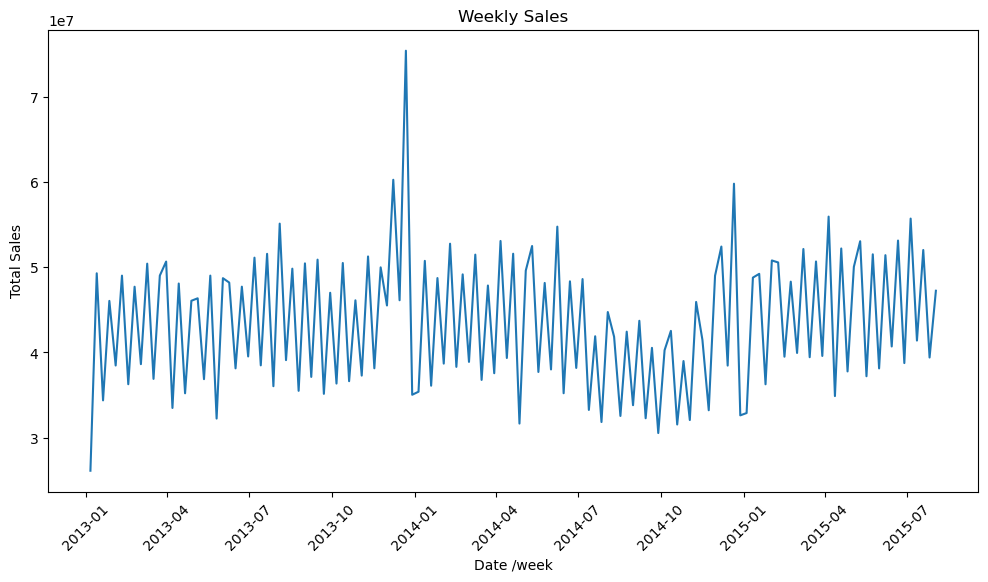

In [529]:
import matplotlib.pyplot as plt

# Data 
x= sales_weekly["Date"]
y= sales_weekly["Sales"]

# Plot
plt.figure(figsize=(12,6))
plt.plot(x,y)

#Labels

plt.xlabel("Date /week")
plt.ylabel("Total Sales")
plt.title("Weekly Sales")
plt.xticks(rotation=45)





plt.show()

Seasonal pattern is clearly visible. We can see clear peaks and valleys repeating roughly every few months.
That’s classic retail seasonality, usually tied to:

holidays (Christmas / New Year)

local events

trade promotions or product launches

Big spikes — that tall one around early 2014 is likely a major holiday campaign (Christmas 2013 → Jan 2014 sales).

Mid-year dips — notice how sales often soften mid-year (typical for FMCG/beer products when there’s no big event).

## Aggregating the Promo variable

In [530]:
sample_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


Now we want to aggregate the promo variable.
Each row in the raw data is one store-day.

Promo = 1 means that store had a promotion running that day.

Promo = 0 means it didn’t.


Our goal now:
Transform all those store-day 0/1 flags into one weekly value
that summarizes “how intense promotions were” that week, across the chain.

Use the mean.
Why?

MMM models work better with continuous proportions (0 → 1) than with raw counts.

It reflects the intensity of promotion activity (e.g., 0.3 = 30% of stores had promos).

It’s comparable across time even if the number of stores changes.

So the plan is to compute:

Weekly average of Promo (percentage of stores on promotion).

In [531]:
promos_weekly= sample_data.groupby(pd.Grouper(key="Date", freq="W"))["Promo"].mean().reset_index()
promos_weekly.head()

,Date,Promo
0,2013-01-06,0.000000
1,2013-01-13,0.831102
2,2013-01-20,0.000000
3,2013-01-27,0.830758
4,2013-02-03,0.000000


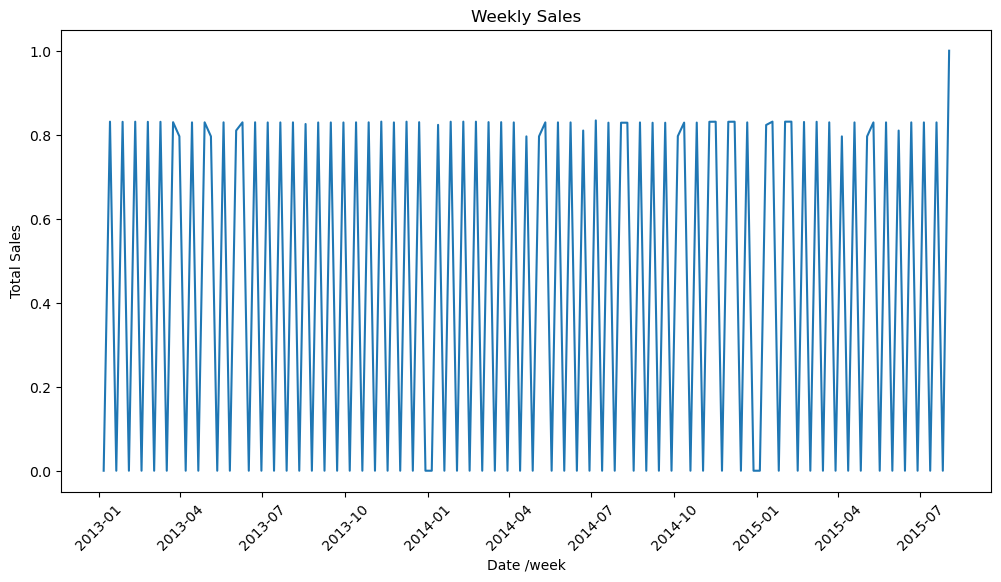

In [532]:
# Data 
x= promos_weekly["Date"]
y= promos_weekly["Promo"]

# Plot
plt.figure(figsize=(12,6))
plt.plot(x,y)

#Labels

plt.xlabel("Date /week")
plt.ylabel("Total Sales")
plt.title("Weekly Sales")
plt.xticks(rotation=45)





plt.show()

Merge sales + promo dfs

In [533]:
promos_sales_weekly= pd.merge(sales_weekly,promos_weekly, on="Date")
promos_sales_weekly.head()

,Date,Sales,Promo
0,2013-01-06,26129335,0.000000
1,2013-01-13,49275222,0.831102
2,2013-01-20,34377765,0.000000
3,2013-01-27,46040169,0.830758
4,2013-02-03,38466029,0.000000


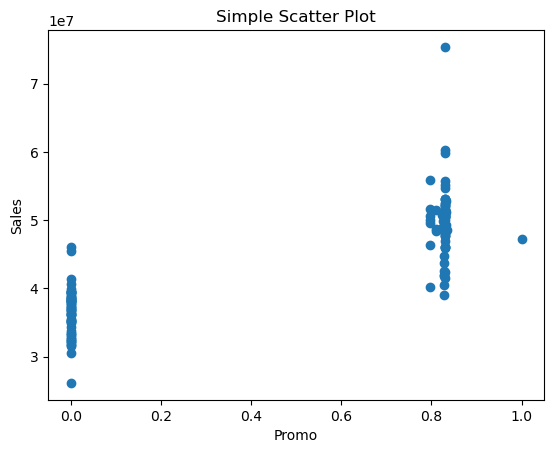

In [534]:
# Visualize correlation between sales and promos 
# Example data
x = promos_sales_weekly["Promo"]
y = promos_sales_weekly["Sales"]

# Create scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("Promo")
plt.ylabel("Sales")
plt.title("Simple Scatter Plot")

# Show the plot
plt.show()

Promotional weeks produce a strong incremental lift in total weekly sales

## Add calendar & seasonal features 

Goal: enrich the dataset with time-based control variables that capture natural sales variation.
To avoid false attribution, ensuring sales peaks aren’t wrongly credited to promotions.

To separate natural cycles (like holidays or weather) from the true marketing or promo impact.

To make the model’s ROI estimates realistic and unbiased across time.

In [535]:
# Extract month, year, and week number, trend(count var).

promos_sales_weekly["Year"]= promos_sales_weekly["Date"].dt.year
promos_sales_weekly["Month"]= promos_sales_weekly["Date"].dt.month
promos_sales_weekly["Week_num"]= promos_sales_weekly["Date"].dt.isocalendar().week
promos_sales_weekly["trend"]= promos_sales_weekly.index 
promos_sales_weekly["trend"]+=1

promos_sales_weekly.head()


,Date,Sales,Promo,Year,Month,Week_num,trend
0,2013-01-06,26129335,0.000000,2013,1,1,1
1,2013-01-13,49275222,0.831102,2013,1,2,2
2,2013-01-20,34377765,0.000000,2013,1,3,3
3,2013-01-27,46040169,0.830758,2013,1,4,4
4,2013-02-03,38466029,0.000000,2013,2,5,5


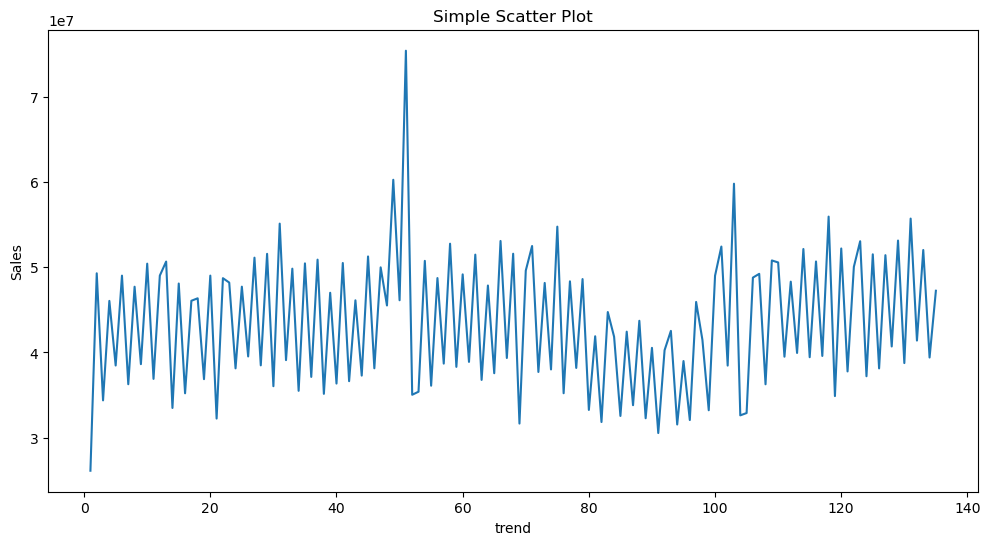

In [536]:
# plot sales vs trend
plt.figure(figsize=(12,6))
x = promos_sales_weekly["trend"]
y = promos_sales_weekly["Sales"]

# Create scatter plot
plt.plot(x, y)

# Add labels and title
plt.xlabel("trend")
plt.ylabel("Sales")
plt.title("Simple Scatter Plot")

# Show the plot
plt.show()

## Adding calendar control variables
- StateHoliday

- SchoolHoliday

Then we’ll aggregate them by week, just like we did with Promo, and merge them into the weekly dataset.

StateHoliday = big national events → structural impact on store openings and traffic.

SchoolHoliday = local/regional seasonality → shifts in family-related consumption.

Both explain natural demand fluctuations unrelated to marketing or promos — so adding them helps your model avoid falsely crediting ads or promotions for those changes.

In [537]:
sample_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


- StateHoliday	max()	If any day in the week is a public/state holiday → mark the week as 1
- SchoolHoliday	mean()	Share of days in that week affected by school closure (0–1)

In [538]:
# Convert 'a', 'b', 'c' → 1
# Convert '0' → 0
sample_data["StateHoliday"] = sample_data["StateHoliday"].isin(["a","b","c"]).astype(int)

holidays_weekly = (
    sample_data.groupby(pd.Grouper(key="Date", freq="W"))
    .agg({
        "StateHoliday": "max",     # if any holiday in the week → 1
        "SchoolHoliday": "mean"    # proportion of days with school closure
    })
    .reset_index()
)

holidays_weekly.head()

,Date,StateHoliday,SchoolHoliday
0,2013-01-06,1,0.740103
1,2013-01-13,0,0.083471
2,2013-01-20,0,0.000000
3,2013-01-27,0,0.000000
4,2013-02-03,0,0.019199


Merge with promos_sales_weekly

In [539]:
weekly_sales = pd.merge(promos_sales_weekly, holidays_weekly, on= "Date")
weekly_sales.head()
#weekly_sales.info()

,Date,Sales,Promo,Year,Month,Week_num,trend,StateHoliday,SchoolHoliday
0,2013-01-06,26129335,0.000000,2013,1,1,1,1,0.740103
1,2013-01-13,49275222,0.831102,2013,1,2,2,0,0.083471
2,2013-01-20,34377765,0.000000,2013,1,3,3,0,0.000000
3,2013-01-27,46040169,0.830758,2013,1,4,4,0,0.000000
4,2013-02-03,38466029,0.000000,2013,2,5,5,0,0.019199


In [540]:
weekly_sales.isna().sum()
weekly_sales.describe()


,Date,Sales,Promo,Year,Month,Week_num,trend,StateHoliday,SchoolHoliday
count,135,1.350000e+02,135.000000,135.000000,135.000000,135.0,135.000000,135.000000,135.000000
mean,2014-04-20 00:00:00,4.350504e+07,0.441560,2013.844444,6.000000,24.088889,68.000000,0.222222,0.206345
min,2013-01-06 00:00:00,2.612934e+07,0.000000,2013.000000,1.000000,1.0,1.000000,0.000000,0.000000
25%,2013-08-28 12:00:00,3.724402e+07,0.000000,2013.000000,3.000000,12.0,34.500000,0.000000,0.000000
50%,2014-04-20 00:00:00,4.243360e+07,0.796089,2014.000000,6.000000,23.0,68.000000,0.000000,0.075841
75%,2014-12-10 12:00:00,4.989564e+07,0.829403,2014.000000,9.000000,35.5,101.500000,0.000000,0.318959
max,2015-08-02 00:00:00,7.537133e+07,1.000000,2015.000000,12.000000,52.0,135.000000,1.000000,0.853156
std,NaN,7.860861e+06,0.414921,0.771379,3.343517,14.593735,39.115214,0.417288,0.267189


# Baseline Model

At this stage, we build a multiple linear regression (OLS) using statsmodels to explain the drivers of weekly sales. The model has a log-linear form:

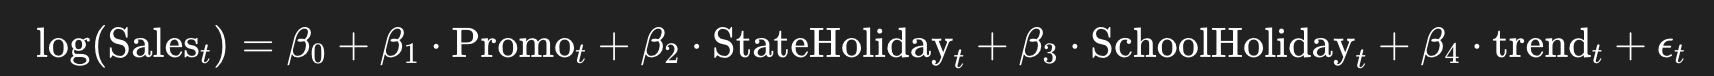



This regression quantifies how each factor (promotions, holidays, trend) influences sales while holding the others constant.

Why linear regression?

- It captures marginal effects — how much sales change when a variable changes.
- It’s interpretable, showing direction, strength, and significance of each driver.
- It serves as the foundation for the full MMM, which will later include media variables and non-linear transformations.

Why use statsmodels instead of scikit-learn?
statsmodels provides detailed statistical output — coefficients, p-values, confidence intervals, and model diagnostics — essential for causal interpretation, not just prediction accuracy.

Why this baseline model matters now:
- It validates that the data pipeline and logic are correct.
- It confirms variables behave as expected (e.g., Promo increases sales).
- It establishes a benchmark before adding marketing spend and advanced MMM effects like adstock and saturation.

In [541]:
import numpy as np
import statsmodels.api as sm

y = np.log(weekly_sales["Sales"])
X = weekly_sales[["Promo", "StateHoliday", "SchoolHoliday", "trend"]] 
X= sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     97.08
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           4.50e-38
Time:                        00:28:18   Log-Likelihood:                 133.58
No. Observations:                 135   AIC:                            -257.2
Df Residuals:                     130   BIC:                            -242.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.4324      0.019    906.786

Business interpretation summary

Promo (main driver):
- +0.3578 on log scale → roughly +35.8% sales lift during promotional weeks.
- Very significant (p < 0.001).
- Confirms the promo data is correct and meaningful.

Holidays:
- State holidays don’t matter much → likely because stores close or customers shift purchases.
- School holidays slightly reduce demand (−11.9%), likely reflecting behavior patterns unrelated to marketing.

Trend:
- Flat — your sales pattern doesn’t drift much once you account for promos and holidays.

*We’re still building understanding, not optimizing performance.*

# Generate realistic media spend for Digital

In [542]:
N= len(weekly_sales)
rng = np.random.default_rng(42)

## Digital channel

1.1 Definir un gasto promedio semanal y una dispersión razonable. Solo base, sin ruido relativo ni boosts todavía.


In [543]:

base_mean = 70_000   # weekly "always-on"
base_sd   = 7_000    # dispersión semanal del base
min_spend = 40_000
max_spend = 120_000

base_spend = rng.normal(loc=base_mean, scale=base_sd, size=N) #array de N valores que simulan gastos base con cierta variabilidad. campana de gauss
base_spend = np.clip(base_spend, a_min=min_spend*0.7, a_max=max_spend*0.9) #recorta valores extremos

weekly_sales["Digital_spend"] = base_spend 
weekly_sales[["Date","Digital_spend"]].head(10) 



,Date,Digital_spend
0,2013-01-06,72133.019558
1,2013-01-13,62720.111256
2,2013-01-20,75253.158371
3,2013-01-27,76583.953015
4,2013-02-03,56342.753679
5,2013-02-10,60884.743452
6,2013-02-17,70894.882822
7,2013-02-24,67786.301854
8,2013-03-03,69882.391897
9,2013-03-10,64028.692507


1.2 Weekly relative noise (pacing / optimization effects)

In [544]:
# Relative weekly noise (~±10%), capped at ±25%
noise_pct_sd = 0.10
rel_noise = rng.normal(loc=0.0, scale=noise_pct_sd, size=N)
rel_noise = np.clip(rel_noise, -0.25, 0.25)

# Apply multiplicative noise and clip back to realistic bounds
weekly_sales["Digital_spend"] = weekly_sales["Digital_spend"] * (1.0 + rel_noise)
weekly_sales["Digital_spend"] = np.clip(
    weekly_sales["Digital_spend"], a_min=min_spend, a_max=max_spend
)
weekly_sales[["Date", "Digital_spend"]].head(8)


,Date,Digital_spend
0,2013-01-06,64807.340986
1,2013-01-13,64686.473596
2,2013-01-20,81560.325505
3,2013-01-27,91875.707494
4,2013-02-03,70428.442099
5,2013-02-10,63407.864655
6,2013-02-17,63879.563915
7,2013-02-24,53333.948578


<Axes: title={'center': 'Digital_spend (base + noise)'}>

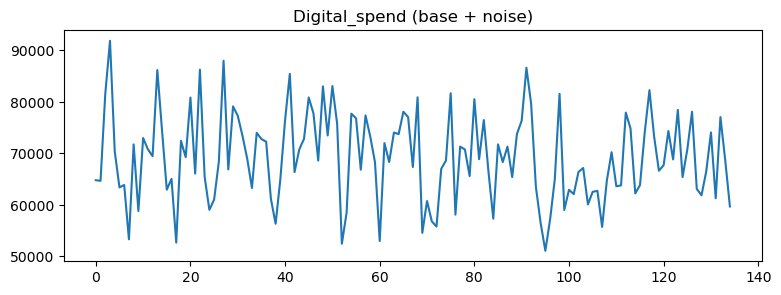

In [545]:
weekly_sales["Digital_spend"].plot(title="Digital_spend (base + noise)", figsize=(9,3))


1.3 Promo & Holiday boosts

Make the Digital_spend more realistic by increasing it during weeks with in-store promotions or holidays.
Digital campaigns typically spend more when there’s a coordinated retail push or higher consumer activity, so we introduce controlled boosts.

In [546]:
# Convert your existing weekly StateHoliday to a clean 0/1 flag
holiday_flag = (~weekly_sales["StateHoliday"].astype(str).isin(["0", "0.0"])).astype(int)
# Promo flag (just to be sure it’s clean)
promo_flag = (weekly_sales["Promo"].fillna(0).astype(float) > 0).astype(int)

# Random boost ranges (realistic)
promo_lo, promo_hi = 0.20, 0.40   # +20–40% spend on promo weeks
holi_lo, holi_hi   = 0.10, 0.20   # +10–20% spend on holiday weeks

# Generate multipliers (1.0 means “no boost”)
promo_mult = 1.0 + promo_flag * rng.uniform(promo_lo, promo_hi, size=len(weekly_sales))
holi_mult  = 1.0 + holiday_flag * rng.uniform(holi_lo, holi_hi, size=len(weekly_sales))

# Combine both and cap to 1.5× total
mult_total = np.clip(promo_mult * holi_mult, 1.0, 1.5)

# Apply to Digital_spend
weekly_sales["Digital_spend"] = weekly_sales["Digital_spend"] * mult_total
weekly_sales["Digital_spend"] = np.clip(
    weekly_sales["Digital_spend"], a_min=min_spend, a_max=max_spend
)
weekly_sales[["Date", "Promo", "StateHoliday", "Digital_spend"]].head(10)



,Date,Promo,StateHoliday,Digital_spend
0,2013-01-06,0.000000,1,71476.013153
1,2013-01-13,0.831102,0,78186.218005
2,2013-01-20,0.000000,0,81560.325505
3,2013-01-27,0.830758,0,114601.069498
4,2013-02-03,0.000000,0,70428.442099
5,2013-02-10,0.831060,0,83333.566119
6,2013-02-17,0.000000,0,63879.563915
7,2013-02-24,0.830742,0,64526.121634
8,2013-03-03,0.000000,0,71753.223630
9,2013-03-10,0.830762,0,76750.044546


Created binary flags for both events:

holiday_flag → 1 if StateHoliday ≠ 0 (meaning a real holiday week).

promo_flag → 1 if Promo > 0.
These ensure the model can detect active promotional or seasonal periods.

Defined realistic boost ranges:

Promo weeks: +20% to +40% increase in digital spend.

Holiday weeks: +10% to +20% increase.

Generated random multipliers within those ranges using the NumPy random generator.

If no promo/holiday: multiplier = 1.0 (no change).

If active: multiplier randomly chosen in the defined range.

Combined and capped the effect:

Both boosts were multiplied together.

The total multiplier was clipped to a maximum of 1.5×, to prevent unrealistic spikes.

Applied the boost to Digital_spend and re-clipped to keep values between the minimum (40k) and maximum (120k).

This process adds realistic campaign-driven peaks to the digital spend time series while maintaining overall control over its scale.

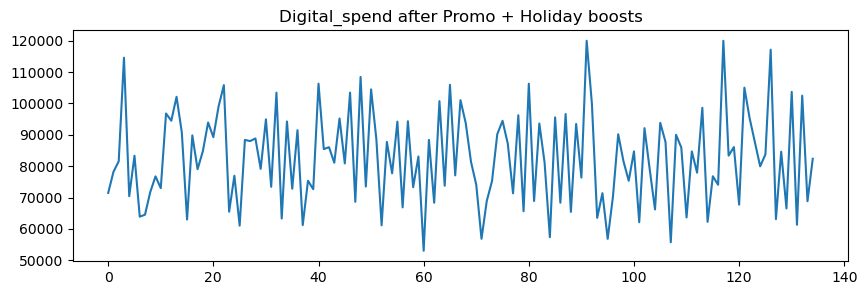

In [547]:
weekly_sales["Digital_spend"].plot(
    figsize=(10,3),
    title="Digital_spend after Promo + Holiday boosts"
);


## Creating a realistic CPM (Cost Per Thousand Impressions)

What CPM represents

It’s the price you pay per 1 000 ad impressions.
So when the market is more competitive — for instance in Q4 holidays — your CPM goes up, meaning the same spend buys fewer impressions.

We’ll make CPM vary with:

Seasonality – higher in Q4 and slightly higher in summer.

Small random noise ± 7 %.

In [548]:
# CPM (seasonality + noise) 
base_cpm = 6.0

# Extract month number from weekly dates
month = pd.to_datetime(weekly_sales["Date"]).dt.month

# Define simple seasonal uplift:
# Q4 (Oct–Dec) more expensive, Summer (Jun–Aug) moderately higher
season_uplift = np.where(
    month.isin([10, 11, 12]), 1.25,
    np.where(month.isin([6, 7, 8]), 1.10, 1.00)
)

# Random week-to-week noise (~±7%), capped at ±20%
cpm_noise = np.clip(rng.normal(0.0, 0.07, size=N), -0.20, 0.20)

# Final CPM = base * seasonal * noise
weekly_sales["CPM"] = base_cpm * season_uplift * (1.0 + cpm_noise)


In [549]:
weekly_sales["CPM"].describe()

count    135.000000
mean       6.400522
std        0.764900
min        4.987833
25%        5.863960
50%        6.251870
75%        6.822943
max        8.838397
Name: CPM, dtype: float64

<Axes: title={'center': 'CPM (seasonality + noise)'}, xlabel='Date'>

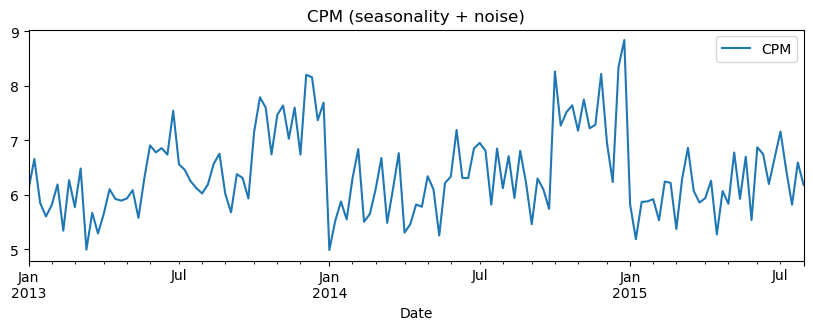

In [550]:
weekly_sales.plot(
    x="Date",
    y="CPM",
    figsize=(10,3),
    title="CPM (seasonality + noise)"
)

## Digital impressions 

In [551]:
# Digital_impressions
weekly_sales["Digital_impressions"] = (
    (weekly_sales["Digital_spend"] / weekly_sales["CPM"].replace(0, np.nan)) * 1000
)

# Optional: if any CPM was 0 (shouldn’t happen), fill NaN with 0
weekly_sales["Digital_impressions"] = weekly_sales["Digital_impressions"].fillna(0)

# Sanity check
weekly_sales[["Date", "Digital_spend", "CPM", "Digital_impressions"]].head(10)



,Date,Digital_spend,CPM,Digital_impressions
0,2013-01-06,71476.013153,6.108456,1.170116e+07
1,2013-01-13,78186.218005,6.657182,1.174464e+07
2,2013-01-20,81560.325505,5.848056,1.394657e+07
3,2013-01-27,114601.069498,5.604729,2.044721e+07
4,2013-02-03,70428.442099,5.811603,1.211859e+07
5,2013-02-10,83333.566119,6.189980,1.346265e+07
6,2013-02-17,63879.563915,5.342381,1.195713e+07
7,2013-02-24,64526.121634,6.267738,1.029496e+07
8,2013-03-03,71753.223630,5.773716,1.242756e+07
9,2013-03-10,76750.044546,6.482081,1.184034e+07


<Axes: title={'center': 'Digital Spend vs. Impressions (weekly)'}, xlabel='Date'>

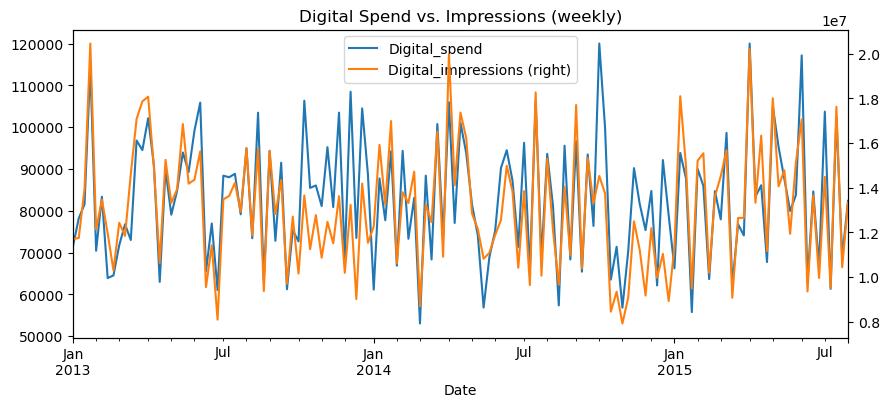

In [552]:
weekly_sales.plot(
    x="Date",
    y=["Digital_spend", "Digital_impressions"],
    secondary_y="Digital_impressions",
    figsize=(10,4),
    title="Digital Spend vs. Impressions (weekly)"
)

🟦 Blue (Digital_spend) = how much money you’re putting in each week.

🟧 Orange (Digital_impressions) = how much ad inventory you’re buying.

The two curves follow each other closely — high correlation (as expected).

But you’ll notice orange dips slightly in periods where CPM was higher (e.g., Q4):
→ same budget → fewer impressions.

✅ That means the “market pricing” dynamics are working — you’ve modeled both investment behavior and media cost pressure realistically.

Correlation CPM vs Impressions: -0.4876336331107539


<Axes: title={'center': 'CPM (left) vs. Digital Impressions (right)'}, xlabel='Date'>

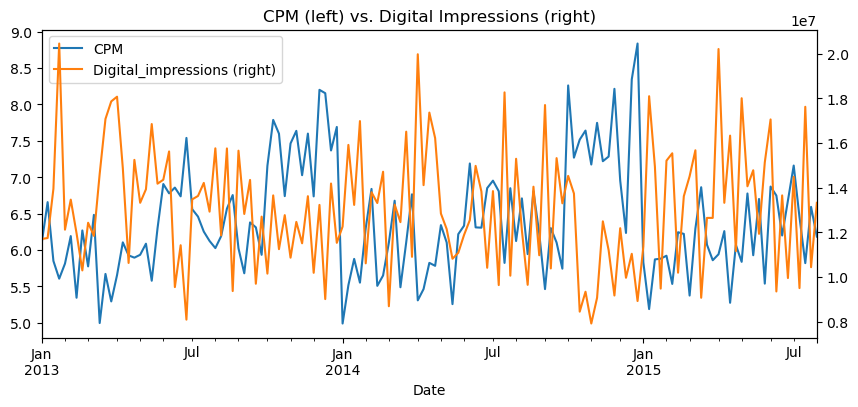

In [553]:
print("Correlation CPM vs Impressions:",
      weekly_sales["CPM"].corr(weekly_sales["Digital_impressions"]))

weekly_sales.plot(
    x="Date",
    y=["CPM", "Digital_impressions"],
    secondary_y="Digital_impressions",
    figsize=(10,4),
    title="CPM (left) vs. Digital Impressions (right)"
)


## CTR (Click-Through Rate) and Digital Clicks

CTR tells you what percentage of the people who saw your ad actually clicked it.
It’s a measure of engagement or how good your ad/targeting was.

Typical digital CTR ranges:

- Branding campaigns: 0.3 % – 0.8 %

- Retail/performance: 1 % – 3 %

We’ll make CTR realistic by:

1. Giving it a base rate (≈ 1 %).

2. Adding random weekly noise (some ads do better than others).

3. Making it higher during promo weeks (because ads are more relevant).

4. Keeping it between sensible limits (0.2 % – 3 %).

In [554]:
# CTR and Digital_clicks ---

# Base CTR ≈ 1%
ctr_base = 0.010

# Weekly random noise ±15%
ctr_noise = np.clip(rng.normal(0.0, 0.15, size=N), -0.3, 0.3)

# Promo boost (ads perform better when a promo is active)
ctr_boost = 1.0 + promo_flag * 0.25  # +25% CTR during promo weeks

# Combine everything
weekly_sales["CTR"] = ctr_base * ctr_boost * (1.0 + ctr_noise)

# Keep CTR within [0.002, 0.03]  (0.2% to 3%)
weekly_sales["CTR"] = weekly_sales["CTR"].clip(0.002, 0.03)

# Calculate clicks
weekly_sales["Digital_clicks"] = weekly_sales["Digital_impressions"] * weekly_sales["CTR"]

# Quick look
weekly_sales[["Date","Digital_impressions","CTR","Digital_clicks"]].head(10)


,Date,Digital_impressions,CTR,Digital_clicks
0,2013-01-06,1.170116e+07,0.009486,111002.906731
1,2013-01-13,1.174464e+07,0.012347,145011.371049
2,2013-01-20,1.394657e+07,0.007442,103783.699864
3,2013-01-27,2.044721e+07,0.009471,193648.184854
4,2013-02-03,1.211859e+07,0.010723,129948.869713
5,2013-02-10,1.346265e+07,0.011520,155088.467467
6,2013-02-17,1.195713e+07,0.007000,83699.932957
7,2013-02-24,1.029496e+07,0.013972,143836.910224
8,2013-03-03,1.242756e+07,0.010409,129352.975140
9,2013-03-10,1.184034e+07,0.011161,132155.770090


<Axes: title={'center': 'Digital Clicks (weekly)'}, xlabel='Date'>

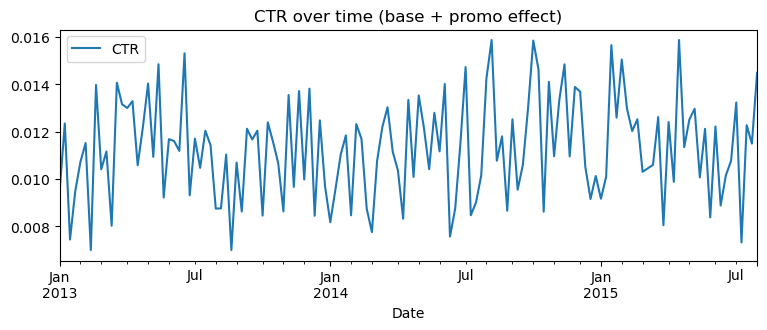

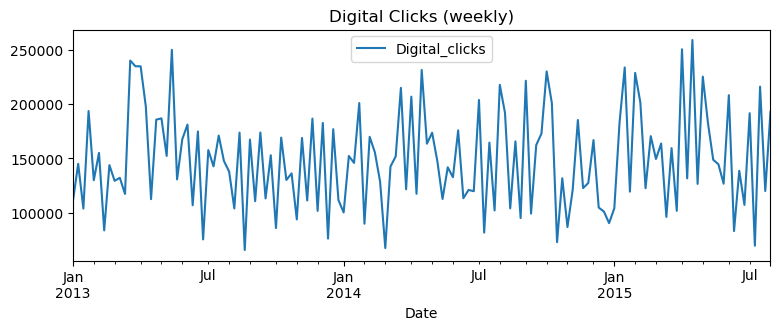

In [555]:
weekly_sales.plot(
    x="Date",
    y=["CTR"],
    figsize=(9,3),
    title="CTR over time (base + promo effect)"
)

weekly_sales.plot(
    x="Date",
    y="Digital_clicks",
    figsize=(9,3),
    title="Digital Clicks (weekly)"
)


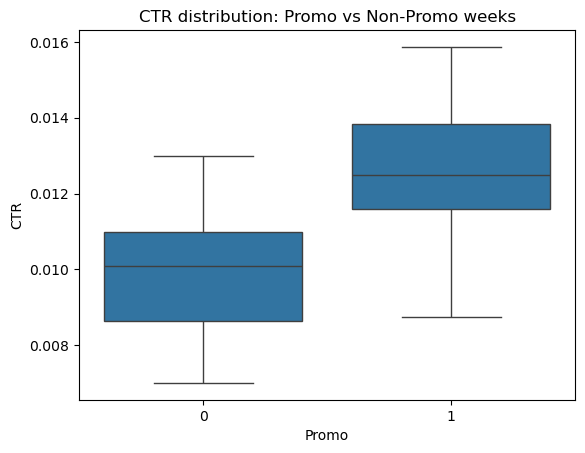

In [556]:
import seaborn as sns
sns.boxplot(
    x=(promo_flag),
    y=weekly_sales["CTR"]
)
plt.title("CTR distribution: Promo vs Non-Promo weeks");


In [557]:
weekly_sales.groupby(promo_flag)["CTR"].mean()


Promo
0    0.009903
1    0.012510
Name: CTR, dtype: float64

## Landing Rate and Product Page Views

After someone clicks your ad, not everyone actually loads or interacts with your website.
Maybe the page is slow, maybe they bounce.
So the Landing Rate tells you what % of clicks turn into real product-page views.

Typical values: 40 – 60 %.
It can go higher during promotions (people are more motivated) or lower if the site is slow.

In [558]:
# Landing Rate and Product Page Views 

# Base landing rate ≈ 45 %
landing_base = 0.45

# Random week-to-week noise ±10 %
landing_noise = np.clip(rng.normal(0.0, 0.10, size=N), -0.2, 0.2)

# Promo boost +10–20 % during active promotions
landing_boost = 1.0 + promo_flag * rng.uniform(0.10, 0.20, size=N)

# Combine all effects
weekly_sales["LandingRate"] = landing_base * landing_boost * (1.0 + landing_noise)

# Clip to realistic bounds (25–70 %)
weekly_sales["LandingRate"] = weekly_sales["LandingRate"].clip(0.25, 0.70)

# Compute product page views
weekly_sales["Product_page_views"] = (
    weekly_sales["Digital_clicks"] * weekly_sales["LandingRate"]
)

# Quick check
weekly_sales[["Date","Digital_clicks","LandingRate","Product_page_views"]].head(10)


,Date,Digital_clicks,LandingRate,Product_page_views
0,2013-01-06,111002.906731,0.496163,55075.497241
1,2013-01-13,145011.371049,0.504316,73131.526628
2,2013-01-20,103783.699864,0.411973,42756.078058
3,2013-01-27,193648.184854,0.449691,87081.888730
4,2013-02-03,129948.869713,0.465507,60492.137175
5,2013-02-10,155088.467467,0.515178,79898.184127
6,2013-02-17,83699.932957,0.507930,42513.698579
7,2013-02-24,143836.910224,0.595245,85618.271631
8,2013-03-03,129352.975140,0.444050,57439.151158
9,2013-03-10,132155.770090,0.457373,60444.448365


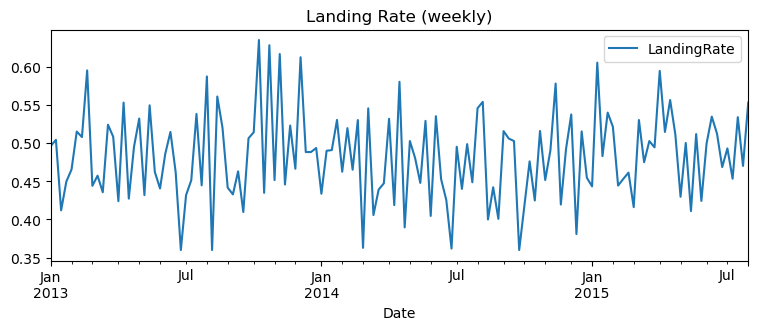

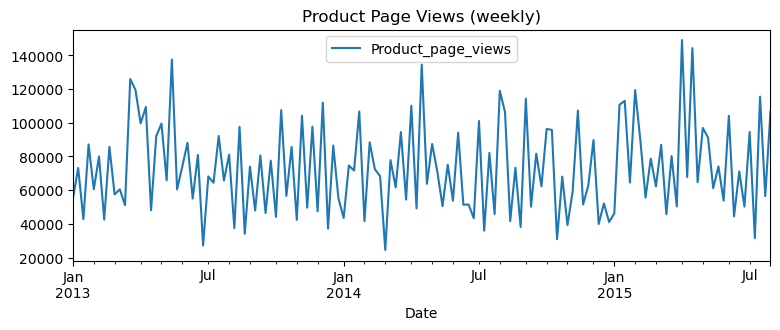

In [559]:
weekly_sales.plot(x="Date", y="LandingRate", figsize=(9,3),
                  title="Landing Rate (weekly)");
weekly_sales.plot(x="Date", y="Product_page_views", figsize=(9,3),
                  title="Product Page Views (weekly)");


# Generate realistic media spend for TV

<Axes: title={'center': 'TV Spend (bursts)'}, xlabel='Date'>

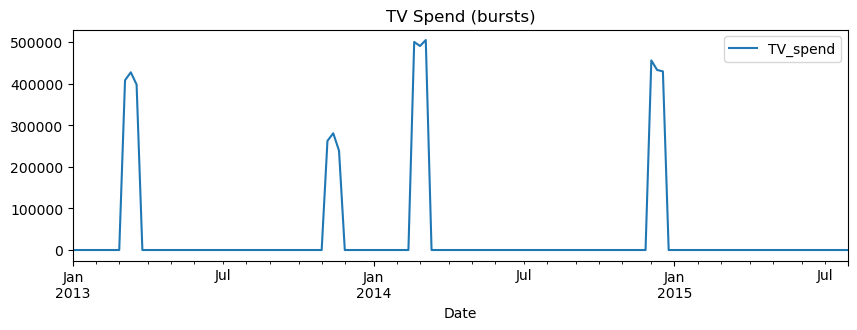

In [560]:
# TV_spend 

tv_spend = np.zeros(N)  # start all zeros

# choose random campaign start weeks
campaign_starts = rng.choice(range(5, N-10), size=4, replace=False)
campaign_starts.sort()

for start in campaign_starts:
    duration = rng.integers(3, 6)                   # 3–5 weeks
    spend_level = rng.uniform(200_000, 500_000)     # spend intensity
    tv_spend[start:start+duration] = rng.normal(
        loc=spend_level, scale=spend_level*0.05, size=duration
    )

weekly_sales["TV_spend"] = np.clip(tv_spend, 0, None)

weekly_sales.plot(
    x="Date",
    y="TV_spend",
    figsize=(10,3),
    title="TV Spend (bursts)"
)



# Generate realistic media spend for OOH

<Axes: title={'center': 'OOH Spend (4-week flights)'}, xlabel='Date'>

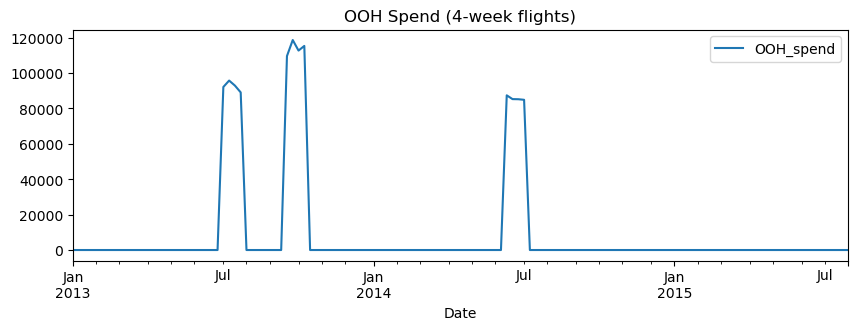

In [561]:
# OOH_spend

ooh_spend = np.zeros(N)

# choose 3–4 random campaign starts
ooh_starts = rng.choice(range(4, N-6), size=3, replace=False)
ooh_starts.sort()

for start in ooh_starts:
    duration = 4                                  # 4-week blocks
    spend_level = rng.uniform(70_000, 110_000)    # steady spend level
    ooh_spend[start:start+duration] = rng.normal(
        loc=spend_level, scale=spend_level*0.05, size=duration
    )

weekly_sales["OOH_spend"] = np.clip(ooh_spend, 0, None)

weekly_sales.plot(
    x="Date",
    y="OOH_spend",
    figsize=(10,3),
    title="OOH Spend (4-week flights)"
)



next steps:

1️⃣ Adstock Transformation – apply carry-over effect to each channel.

2️⃣ Saturation Transformation – model diminishing returns.

3️⃣ MMM Regression Model – estimate sales vs. media + controls.

4️⃣ Diagnostics & Validation – check fit, residuals, multicollinearity.

5️⃣ ROI & Elasticities – translate coefficients into business impact.

6️⃣ Scenario Simulation / Optimization – test budget what-ifs.
